# Annotation template for community annotations

This jupyter notebook guides to annotate better in groups of people with the help of napari. But it can be also used by individuals to better keep an overview. 

__Assumption:__ You preprocessed your data (rescaling, normalization, cropping, tiling, ...) and are now working with tif-images

## 1. Defining a folder and reading in an image in napari

In [1]:
from skimage.io import imread, imshow
import os
import napari
from os import listdir
from os.path import isfile, join
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
import numpy as np

Basically, it would be cool to have a folder structure like this:

In [2]:
scheme = imread("../imgs/scheme.jpg")

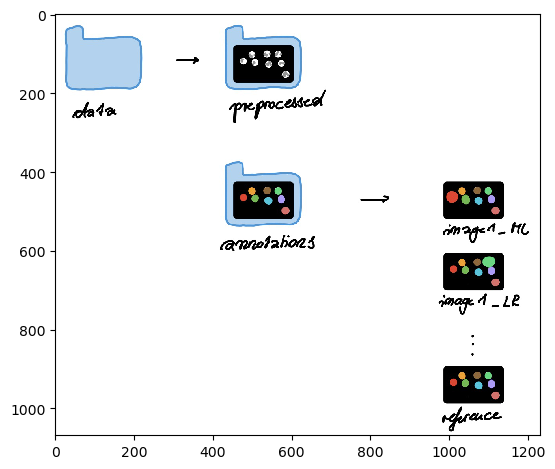

In [3]:
imshow(scheme)

Now we are guiding to the folder with the preprocessed image we want to annotate

In [4]:
#read in tif-image
tif_folder = "../data/1_preprocessed/"

In [5]:
#append directory and sort
def get_sorted_image_list(directory):
    files = [join(directory, f) for f in listdir(directory) if isfile(join(directory, f)) and f.endswith('tif')]
    return sorted(files)

In [6]:
file_list = get_sorted_image_list(tif_folder)
file_list

['../data/1_preprocessed/tp7_channel1_rescaled(256x256x103).tif']

For our annotations we use [napari](https://napari.org/stable/):

In [7]:
#create napari-viewer
viewer = napari.Viewer()

Choose an image from the tif-folder: 
- file_list[0] = first element in the file_list
- file_list[1] = second element in the file_list
- ...

In [8]:
img = imread(file_list[0])

Now we are adding our image to napari:

In [9]:
#add image to napari
layer = viewer.add_image(img, colormap = 'cyan', blending = 'additive')

In [10]:
viewer.dims.ndisplay=3

The image we are now going to annotate looks like this:

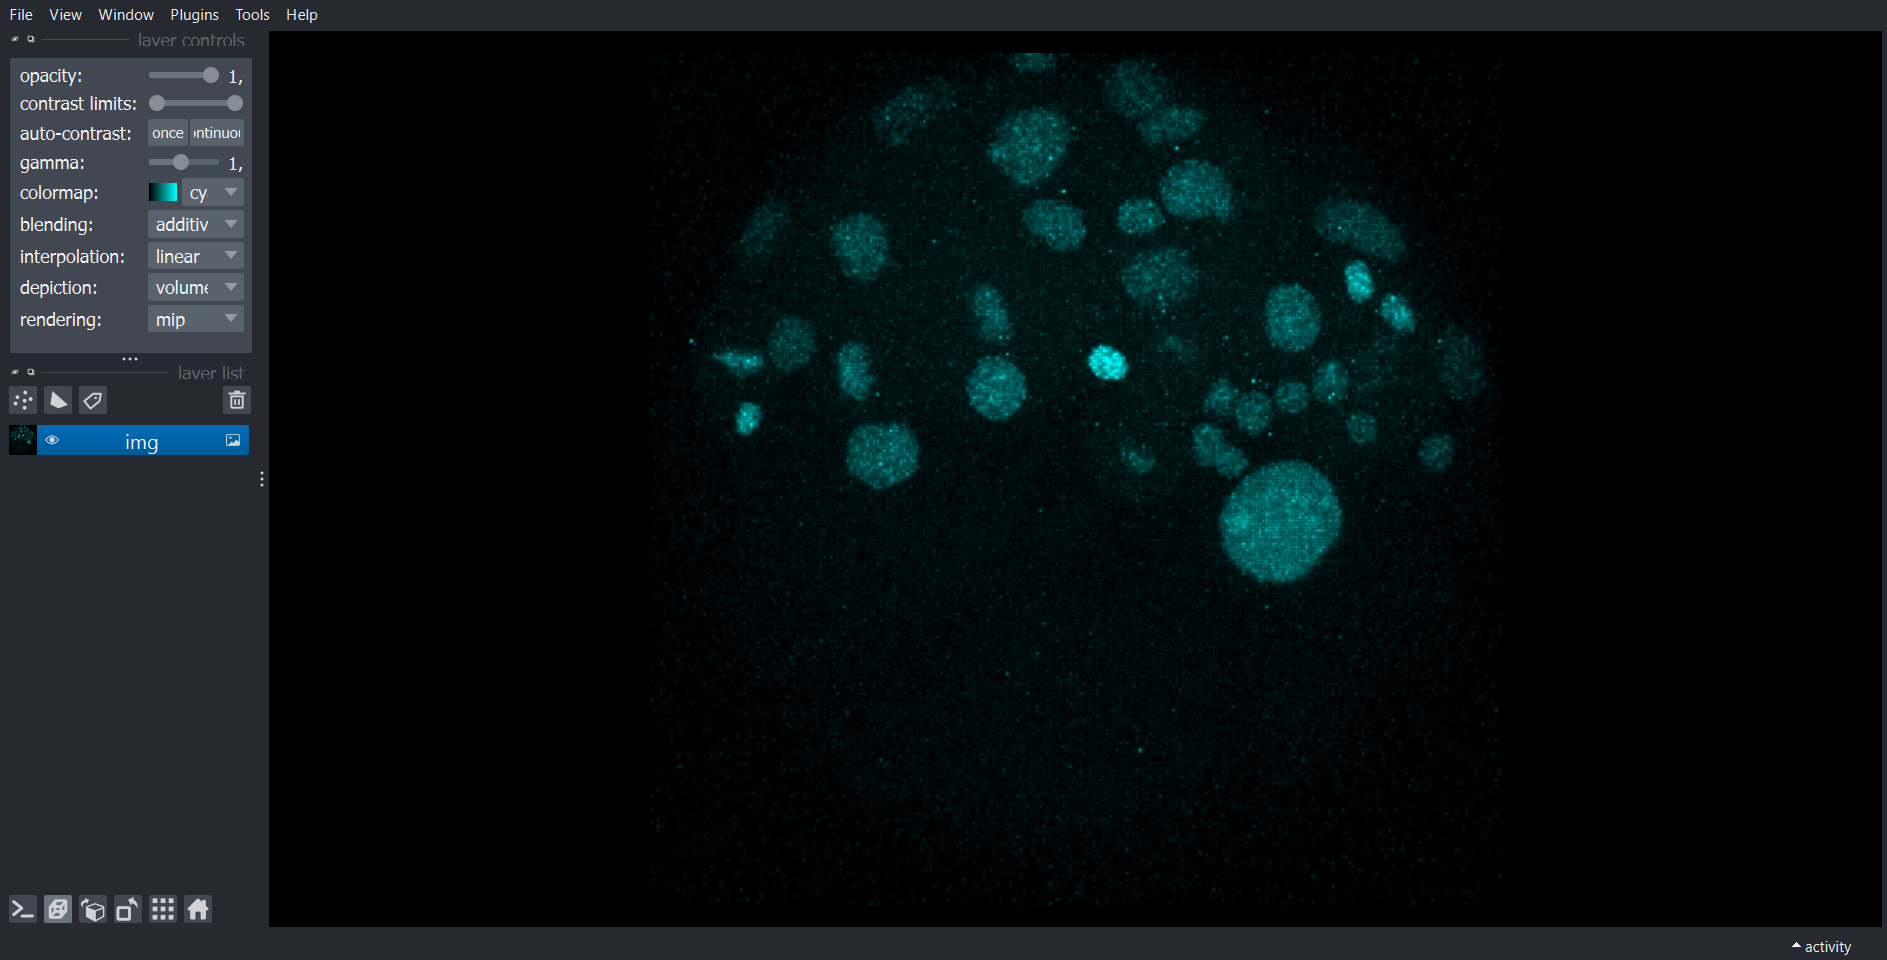

In [11]:
napari.utils.nbscreenshot(viewer)

Now you can add a label layer to the viewer and annotate in napari as shown in the [blogpost](https://focalplane.biologists.com/2023/02/28/annotating-3d-images-in-napari/) using the `napari-nd-annotator`.

All people annotate the same images, in that way we can balance the interpersonal differences between the annotations.

## Creating an annotation folder and annotations

When you are finished with your annotations, you can create an annotation-folder and save your annotations:

In [71]:
annotation_folder = "data/2_annotations/name/"

In [72]:
#creating annotation folder
os.makedirs(annotation_folder, exist_ok=True)

## Here a domain expert can give insights how the annotation should look like so that everyone knows how to annotate

Basically, here one "domain expert" and we annotated the same image. You can see it with this maximum projection in 2D:

The show-function was taken and modified from [here](https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/19_spatial_transforms/scaling.html).

In [13]:
reference_annotation = imread("../data/2_annotations/name/reference_annotation.tif")
my_annotation = imread("../data/2_annotations/name/annotation_ML.tif")

In [14]:
def show(img, reference_annotation, my_annotation):
    """
    This function generates three projections: in X-, Y- and Z-direction and shows them.
    """
    
    img_projection_x = cle.maximum_x_projection(img)
    img_projection_y = cle.maximum_y_projection(img)
    img_projection_z = cle.maximum_z_projection(img)

    ref_projection_x = cle.maximum_x_projection(reference_annotation)
    ref_projection_y = cle.maximum_y_projection(reference_annotation)
    ref_projection_z = cle.maximum_z_projection(reference_annotation)
    
    my_projection_x = cle.maximum_x_projection(my_annotation)
    my_projection_y = cle.maximum_y_projection(my_annotation)
    my_projection_z = cle.maximum_z_projection(my_annotation)

    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    cle.imshow(img_projection_x, plot=axs[0,0], labels=False)
    cle.imshow(img_projection_y, plot=axs[0,1], labels=False)
    cle.imshow(img_projection_z, plot=axs[0,2], labels=False)
    cle.imshow(ref_projection_x, plot=axs[1,0], labels=True)
    cle.imshow(ref_projection_y, plot=axs[1,1], labels=True)
    cle.imshow(ref_projection_z, plot=axs[1,2], labels=True)
    cle.imshow(my_projection_x, plot=axs[2,0], labels=True)
    cle.imshow(my_projection_y, plot=axs[2,1], labels=True)
    cle.imshow(my_projection_z, plot=axs[2,2], labels=True)
    plt.show()

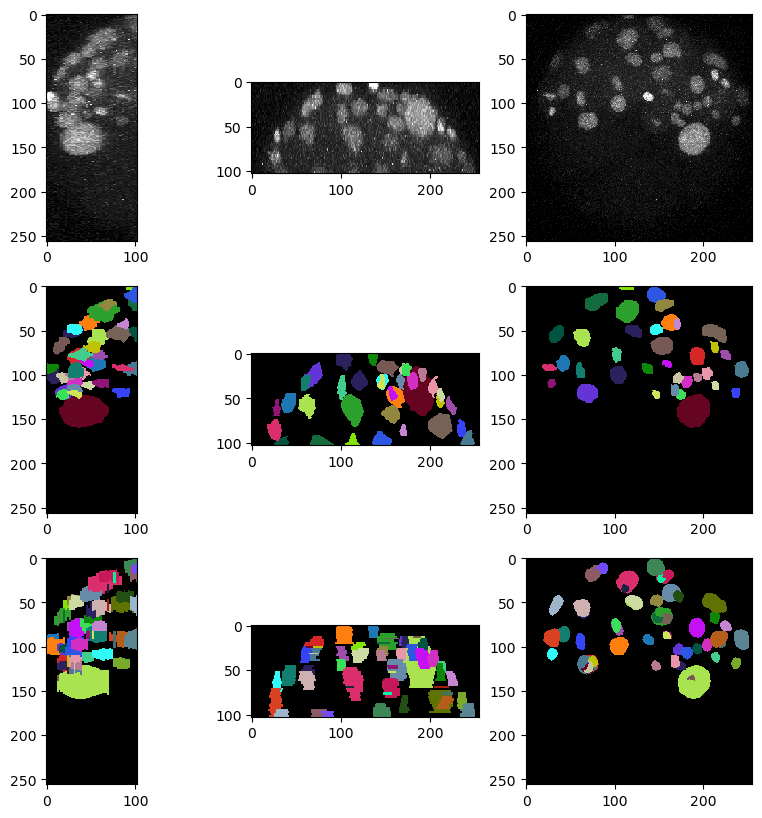

In [15]:
show(img, reference_annotation, my_annotation)

__Dataset:__

[Ozpolat, B. et al](https://doi.org/10.5281/zenodo.1063531) licensed [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/legalcode)
(single timepoint, single channel, rescaled)

## Comparing annotations to each other using Cohen's kappa

We are now using [Cohen's kappa](https://en.wikipedia.org/wiki/Cohen%27s_kappa) to compare our annotation to the annotation of the domain expert

[Cohen's kappa](https://en.wikipedia.org/wiki/Cohen%27s_kappa) is a measure intended to be used to compare annotations generated by different people. The kappa score can lie between -1 and 1. Hereby, a `kappa score > 0.8` is considered as good and a `kappa score < 0` as no agreement / randomness. It can be used for binary and multiclass-problems, but not multilabel problems. Furthermore, only two annotators at a time can be compared.

In [16]:
threshold = 1
reference_annotation_binary = reference_annotation >= threshold
my_annotation_binary = my_annotation >= threshold

reference_annotation_1d = np.ravel(reference_annotation_binary)
my_annotation_1d = np.ravel(my_annotation_binary)

In [17]:
cohen_kappa_score(reference_annotation_1d, my_annotation_1d)

0.7899464805705775

My annotation has a `cohen_kappa_score` < 0.8. This means I need to annotate again until it is > 0.8 when compared to the ground truth annotation of the domain expert

## Saving the annotations

In [58]:
#now we say how we want to name the annotation file
filename = "annotation_ML"

Now delete every layer from the viewer except of the label layer.

In [60]:
viewer.layers.save(annotation_folder + filename)

['C:\\Users\\maral\\Documents\\GitHub\\3D annotation and segmentation quality assurance\\data\\2_annotations\\image1\\tmphd1nllsl\\Labels.tif',
 'C:\\Users\\maral\\Documents\\GitHub\\3D annotation and segmentation quality assurance\\data\\2_annotations\\image1\\tmphd1nllsl\\Image:0.tif']

Now you can also delete the label layer and open the next image.

In the end, document how you annotated the images. The aim is to be as transparent as possible. Consider including your annotations into your publication when publishing your data.